In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',None)

#####  1. 문제 정의
- 영화 리뷰 데이터셋을 활용하여, 긍정 리뷰와 부정 리뷰를 구분하는 감성 분석을 해보자.
- 긍정/부정 리뷰에서 자주 사용되는 단어를 확인해보자.

#### 2. 데이터 수집 
-Large movie dataset을 다운로드 함.

In [3]:
from sklearn.datasets import load_files # 간단하게 읽어올 수 있음

In [4]:
train_data_url = 'aclImdb/train'
reviws_train = load_files(train_data_url , shuffle=True)

In [5]:
test_data_url = 'aclImdb/test'
reviws_test = load_files(test_data_url , shuffle=True)

In [6]:
reviws_test

{'data': [b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!",
  b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hopi

In [7]:
reviws_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
len(reviws_train.data)

25000

In [9]:
reviws_train.target

array([1, 0, 1, ..., 0, 0, 0])

In [10]:
len(reviws_test.data)

25000

#####  3. 데이터 전처리
- 일반 정형화 데이터 : 결측치, 스케일링 ,특성공학, 이상치...
- 텍스트 데이터
    - 오탈자 제거
    - 띄어쓰기 교정
    - 이모티콘 수정
    - 불필요한 글자 제거
    - 데이터 정형화 -> 토큰화 , 수치화

In [11]:
# br 태크 제거
reviws_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [12]:
text_train = [txt.replace(b"<br />", b" ") for txt in reviws_train.data] # 앞에 b(바이너리)는 타입임(바이너리 타입의 br태그를 지우겠다)

In [13]:
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

In [14]:
text_test = [txt.replace(b"<br />", b" ") for txt in reviws_test.data]

In [15]:
text_test[0]

b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!"

#####  BOW(Bag of word)
단어 토큰화 및 단어 사전 구축
CountVectorizer = 띄어쓰기 단위로 단어들을 추출하고, 단어사전까지 생성함

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
movie_count = CountVectorizer()

In [18]:
movie_count.fit(text_train)

CountVectorizer()

In [19]:
len(movie_count.vocabulary_)

74849

In [19]:
movie_count.vocabulary_

{'zero': 74609,
 'day': 16697,
 'leads': 38088,
 'you': 74324,
 'to': 67125,
 'think': 66526,
 'even': 22718,
 're': 53749,
 'why': 72965,
 'two': 68769,
 'boys': 8714,
 'young': 74334,
 'men': 42153,
 'would': 73714,
 'do': 19326,
 'what': 72703,
 'they': 66474,
 'did': 18292,
 'commit': 13616,
 'mutual': 44618,
 'suicide': 64223,
 'via': 71205,
 'slaughtering': 60766,
 'their': 66367,
 'classmates': 12694,
 'it': 34683,
 'captures': 10582,
 'must': 44560,
 'be': 6334,
 'beyond': 7145,
 'bizarre': 7518,
 'mode': 43375,
 'of': 46680,
 'being': 6663,
 'for': 25450,
 'humans': 32047,
 'who': 72904,
 'have': 30118,
 'decided': 16929,
 'withdraw': 73343,
 'from': 26180,
 'common': 13635,
 'civility': 12582,
 'in': 33004,
 'order': 47196,
 'define': 17169,
 'own': 47889,
 'world': 73651,
 'coupled': 15137,
 'destruction': 17920,
 'is': 34585,
 'not': 46050,
 'perfect': 49221,
 'movie': 44147,
 'but': 9881,
 'given': 27619,
 'money': 43572,
 'time': 66925,
 'the': 66339,
 'filmmaker': 24569,

In [20]:
X_train = movie_count.transform(text_train) # 단어를 세어줌

In [21]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [22]:
X_test = movie_count.transform(text_test)

In [23]:
X_test

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3324812 stored elements in Compressed Sparse Row format>

#####  4.. 탐색적 데이터 분석 (생략)

#####  5. 모델 선택
- 분류 모델을 사용해야함
- 0이 많이 들어간 희소한 데이터는 knn의 성능이 잘 나오지 않음
- 딕시젼트리는 tree가 깊이 만들어질 가능성이 높아지기 때문에 추천하지 않음
- 희소한 데이터는 선형 모델이 비교적 성능이 월등함

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [25]:
logi_model = LogisticRegression()

In [26]:
logi_result = cross_val_score(logi_model, X_train, reviws_train.target, cv=3)

C:\Users\SMT051\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT051\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [27]:
logi_result.mean()

0.8775600076078877

#####  6. 모델 하이퍼파라미터 튜닝

##### 
- counntvecorizer
    - min_df(전체 문장에서 최소 등장 횟수),max_df(전체문장에서 정한 단어가 몇개 이상 등장하면 제거)
- logisticregression

In [28]:
logi_model.fit(X_train,reviws_train.target)
logi_model.score(X_test,reviws_test.target)

C:\Users\SMT051\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.86408

In [29]:
from sklearn.model_selection import GridSearchCV

In [1]:
from sklearn.pipeline import make_pipeline

In [31]:
pipe_model = make_pipeline(CountVectorizer(),LogisticRegression())

In [32]:
param_grid={
    'countvectorizer__max_df' : [15000,20000,23000],
    'countvectorizer__min_df' : [3,5,7],
    'countvectorizer__ngram_range':[(1,1),(1,2),(1,3)],
    'logisticregression_C' : [0.01,0.1,1,10,100]
}
grid = GridSearchCV(pipe_model,param_grid, cv =3 )

In [33]:
grid.fit(text_train,reviews_train.target)

NameError: name 'reviews_train' is not defined

##### 7. 모델 평가

#####  8. 모델 활용

In [ ]:
review = ["When somebody rates a movie as a 'must-see', there are two things which the movie may have accomplished: a) when watching the movie, there is literally not a single negative thing about the movie. And b) the movie affects or represents our culture to an extreme degree. The Dark Knight accomplishes both of these things in 2.5 hours. It is, without a doubt, one of the best films ever made. From the beginning, we are put into the angle of a villain who represents the opposite of Batman. Bruce Wayne, aka Batman, represents order, steadiness, and morality. The Joker represents the polar opposite: chaos, destabilization, and the belief that everybody is morally corruptible. The biggest feat of this movie is that the villain is correct. Every single person is capable of evil, and that's the underlying message of this film. Harvey Dent represents everything good about Gotham. He has hope and strong moral values. But the Joker is at work in him, slowly eating away at the underside of Gotham like acid. And when the Joker picks Harvey Dent, all falls to chaos. It is difficult to describe how deep the relationships between all of the characters are. From the opening bank robbery scene, to the Joker's epic conclusion, to Two Face's violent crimes, the hate of the characters in this movie can practically be felt through the screen. The Joker is physically greater than Batman; he is not stronger, but impossible to physically and mentally break. Batman's pathetic attempts against him are feeble against the underlying plan of the Joker. "] 

In [ ]:
transformed_reivew = movie_count.transform(review)

In [ ]:
logi_model.predict(transformed_reivew)

#### 각 단어별 가중치 확인

In [22]:
best_model = make_pipeline(CountVectorizer(max_df=15000,
                                          min_df=3,
                                          ngram_range=(1,3)),
                          LogisticRegression(C=0.1))

In [24]:
best_model.fit(text_train, reviws_train.target)

C:\Users\SMT051\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [25]:
best_model.steps

[('countvectorizer',
  CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
 ('logisticregression', LogisticRegression(C=0.1))]

In [26]:
logi_model = best_model.steps[1][1]

In [27]:
logi_model.coef_.shape

(1, 476900)

In [28]:
count_model = best_model.steps[0][1]

In [29]:
count_model.vocabulary_

{'zero': 476618,
 'day': 96491,
 'leads': 223997,
 'you': 472922,
 'think': 404294,
 'even': 118979,
 're': 313711,
 'why': 459644,
 'two': 430291,
 'boys': 65441,
 'young': 475431,
 'men': 243864,
 'would': 469540,
 'do': 105127,
 'what': 452201,
 'they': 401497,
 'did': 100985,
 'commit': 87301,
 'mutual': 257395,
 'suicide': 359605,
 'via': 438448,
 'slaughtering': 342952,
 'their': 397032,
 'classmates': 84046,
 'captures': 76553,
 'must': 257096,
 'be': 51742,
 'beyond': 61019,
 'bizarre': 62264,
 'mode': 247151,
 'being': 57963,
 'humans': 181949,
 'who': 457100,
 'have': 163441,
 'decided': 97752,
 'withdraw': 466059,
 'from': 144000,
 'common': 87352,
 'civility': 83589,
 'order': 290555,
 'define': 98273,
 'own': 294859,
 'world': 468529,
 'coupled': 92379,
 'destruction': 100062,
 'not': 264532,
 'perfect': 299033,
 'given': 151152,
 'money': 247709,
 'time': 412270,
 'filmmaker': 133564,
 'actors': 6351,
 'had': 158719,
 'remarkable': 319130,
 'product': 308948,
 'terms': 36

In [30]:
df=pd.DataFrame([count_model.vocabulary_.keys(),count_model.vocabulary_.values()])

In [31]:
df.head()

0      1       2       3       4       5       6       7       8       \
0    zero    day   leads     you   think    even      re     why     two   
1  476618  96491  223997  472922  404294  118979  313711  459644  430291   

  9       ...    476890   476891           476892                   476893  \
0   boys  ...  man were  said uh  classic science  classic science fiction   
1  65441  ...    238685   325757            83961                    83962   

               476894       476895        476896       476897     476898  \
0  for some audiences  room to the  the story oh  money going  real draw   
1              140395       324114        393109       247780     314656   

           476899  
0  along but then  
1           13460  

[2 rows x 476900 columns]

In [32]:
df.T.head()

0       1
0   zero  476618
1    day   96491
2  leads  223997
3    you  472922
4  think  404294

In [34]:
df.T.sort_values(by=1).head()

0  1
47233       00  0
311627   00 am  1
191885  00 and  2
47349   00 but  3
231792  00 for  4

In [35]:
df.T.sort_values(by=1).tail()

0       1
233592     zuniga  476895
274504  zuniga is  476896
210082      zwick  476897
249596     émigré  476898
346987       über  476899

In [36]:
df = df.T.sort_values(by=1)

In [38]:
df.reset_index(inplace=True)

In [41]:
df['coef'] = logi_model.coef_.reshape(-1)

In [42]:
df

index          0       1      coef
0        47233         00       0 -0.020084
1       311627      00 am       1 -0.006207
2       191885     00 and       2  0.004148
3        47349     00 but       3  0.010682
4       231792     00 for       4 -0.018223
...        ...        ...     ...       ...
476895  233592     zuniga  476895 -0.008109
476896  274504  zuniga is  476896 -0.015363
476897  210082      zwick  476897 -0.002306
476898  249596     émigré  476898 -0.016852
476899  346987       über  476899 -0.010517

[476900 rows x 4 columns]

In [43]:
df.sort_values(by="coef",inplace=True)

In [44]:
df.head(30)

index               0       1      coef
469039   1533           worst  469039 -0.969770
48561    6832           awful   48561 -0.933459
64297    4397          boring   64297 -0.868215
446322   2492           waste  446322 -0.827677
305076   7408            poor  305076 -0.696795
305248  17211          poorly  305248 -0.677238
104002  18147  disappointment  104002 -0.666929
365196     76        terrible  365196 -0.640688
103960  23580   disappointing  103960 -0.633977
396483   2506       the worst  396483 -0.630933
468891   5583           worse  468891 -0.630004
179280    211        horrible  179280 -0.618223
110889  14786            dull  110889 -0.601940
49419     201             bad   49419 -0.569330
221980   4402            lame  221980 -0.564498
33569    7422        annoying   33569 -0.556199
244401   2039            mess  244401 -0.552839
221755  32147           lacks  221755 -0.548845
432369  15963   unfortunately  432369 -0.539850
48076    8978           avoid   48076 -0.520085
326800  12735            save  326800 -0.507008
321965    264      ridiculous  321965 -0.496643
357993    257          stupid  357993 -0.484611
125265  27389           fails  125265 -0.481349
223316   2568       laughable  223316 -0.463039
449282   9438            weak  449282 -0.454350
267073  20145       not worth  267073 -0.451693
281501   1952              oh  281501 -0.450902
50326   11729           badly   50326 -0.449464
304559   2504       pointless  304559 -0.438915

In [45]:
df.tail()

index          0       1      coef
360003  15081     superb  360003  0.553871
15771   10842    amazing   15771  0.563726
467309   3779  wonderful  467309  0.661697
299033     46    perfect  299033  0.695479
122242   9858  excellent  122242  0.780271

In [46]:
pos_neg_top_30 = pd.concat([
    df.head(30)[[0,'coef']],
    df.tail(30)[[0,'coef']],
])

In [47]:
pos_neg_top_30.head()

0      coef
469039   worst -0.969770
48561    awful -0.933459
64297   boring -0.868215
446322   waste -0.827677
305076    poor -0.696795

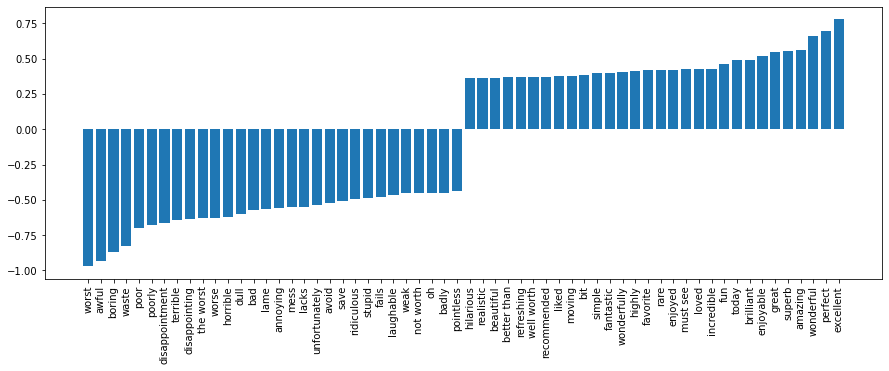

In [49]:
plt.figure(figsize=(15,5))
plt.bar(pos_neg_top_30[0],pos_neg_top_30['coef'])
plt.xticks(rotation=90)
plt.show()